![](https://repository-images.githubusercontent.com/4704710/fd110d80-63d1-11eb-9ae4-de7c23c9dedc)

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. 
- Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. 
- Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

# Table of Contents

* [Figure-level vs. axes-level functions](#01)
* [Visualizing statistical relationships](#01a)
    * [Relating variables with scatter plots](#01b)
    * [Emphasizing continuity with line plots](#01c)
        * [Converting to datetime](#01d)
        * [Aggregation and representing uncertainty](#01e)
        * [Plotting subsets of data with semantic mappings](#01f)
    * [Showing multiple relationships with facets](#01g)
* [Visualizing distributions of data](#02)
    * [Plotting univariate histograms](#02a)
        * [Choosing the bin size](#02b)
        * [Conditioning on other variables](#02c)
        * [Normalized histogram statistics](#02d)
    * [Kernel density estimation](#02e)
        * [Choosing the smoothing bandwidth](#02f)
        * [Conditioning on other variables](#02g)
        * [Kernel density estimation pitfalls](#02h)
    * [Empirical cumulative distributions](#02i)
    * [Visualizing bivariate distributions](#02j)
    * [Plotting joint and marginal distributions](#02k)
    * [Plotting many distributions](#02l)
* [Visualizing categorical data](#03)
    * [Categorical scatterplots](#03a)
    * [Comparing distributions](#03b)
        * [Boxplots](#03c)
        * [Boxenplot](#03d)
        * [Violinplots](#03e)
    * [Estimating central tendency](#03f)
        * [Bar plots](#03g)
        * [Count plots](#03h)

# Figure-level vs. axes-level functions<a class="anchor" id="01"></a>
There is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. 

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

In [3]:
# Importing necessary stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Setting up style
By default, seaborn plots will be made with the current values of the matplotlib rcParams:

<AxesSubplot: >

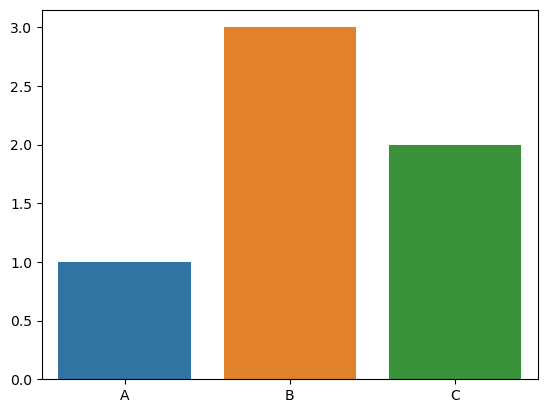

In [4]:
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

Calling this function with no arguments will activate seaborn’s “default” theme:

<AxesSubplot: >

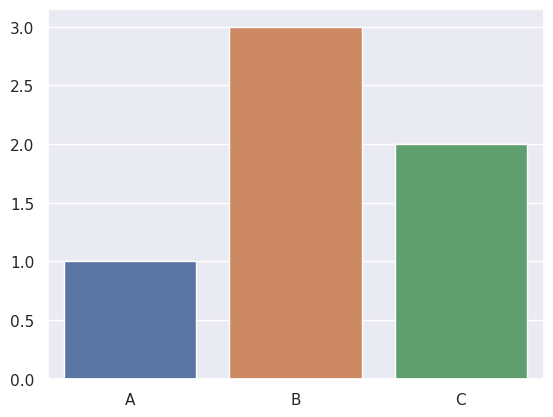

In [5]:
sns.set_theme()
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

Note that this will take effect for all matplotlib plots, including those not made using seaborn:

<BarContainer object of 3 artists>

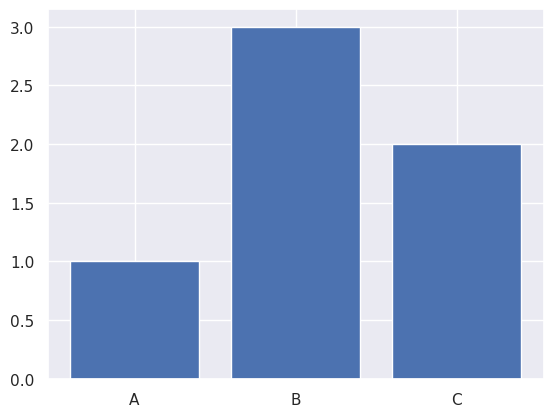

In [6]:
plt.bar(["A", "B", "C"], [1, 3, 2])

<AxesSubplot: >

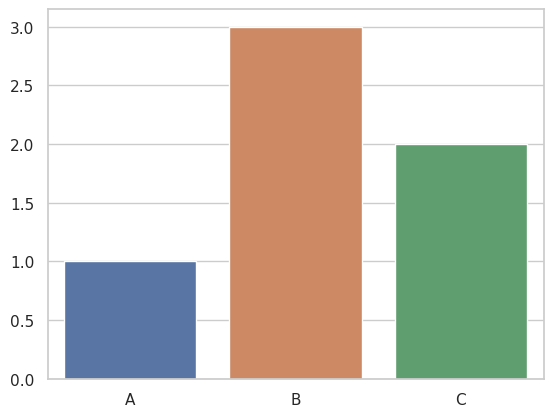

In [7]:
sns.set_theme(style="whitegrid")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

<AxesSubplot: >

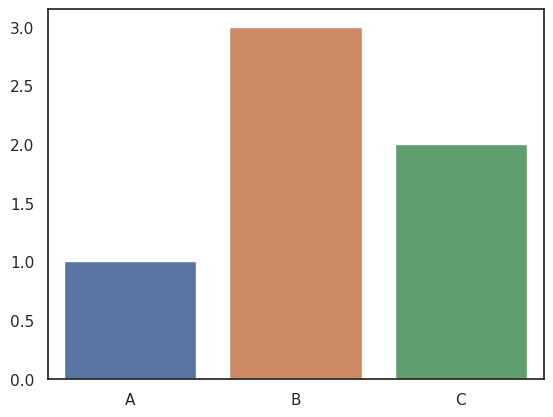

In [9]:
sns.set_theme(style="white")
sns.barplot(x=["A", "B", "C"], y=[1, 3, 2])

We are going to go with ```darkgrid```

In [10]:
# Setting up style
sns.set_theme(style="darkgrid")

# Visualizing statistical relationships<a class="anchor" id="01a"></a>

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

Visualizing statistical relationships using two common approaches: scatter plots and line plots. 
- ```scatterplot()``` (with ```kind="scatter"```; the default)
- ```lineplot()``` (with ```kind="line"```)

As we will see, these functions can be quite illuminating because they use simple and easily-understood representations of data that can nevertheless represent complex dataset structures. They can do so because they plot two-dimensional graphics that can be enhanced by mapping up to three additional variables using the semantics of hue, size, and style.

## Relating variables with scatter plots<a class="anchor" id="01b"></a>
The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

There are several ways to draw a scatter plot in seaborn. The most basic, which should be used when both variables are numeric, is the scatterplot() function. In the categorical visualization tutorial, we will see specialized tools for using scatterplots to visualize categorical data.

In [11]:
# tips = sns.load_dataset("tips")
tips = pd.read_csv('data/tips.csv')

In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
type(tips)

pandas.core.frame.DataFrame

### Plotting

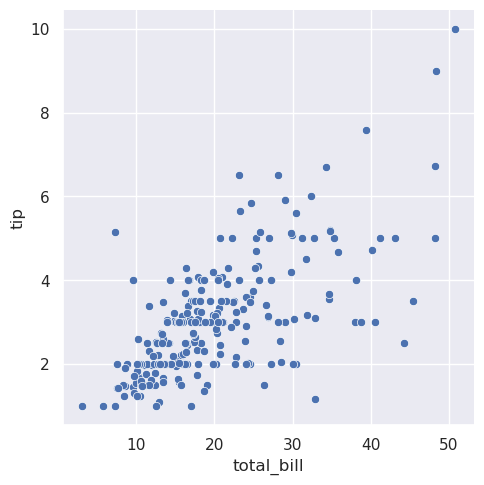

In [14]:
sns.relplot(data=tips, x="total_bill", y="tip")

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. 

In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

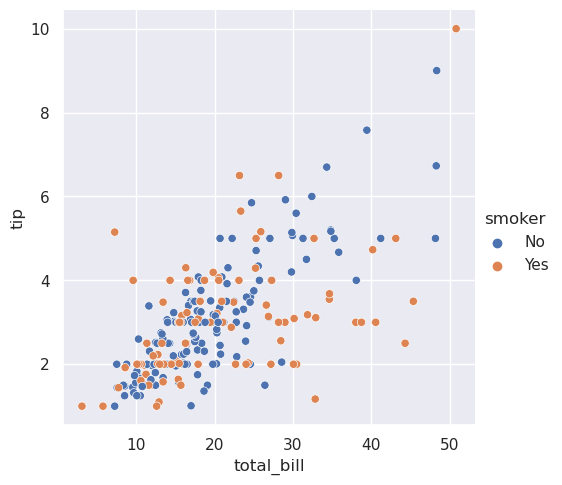

In [15]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

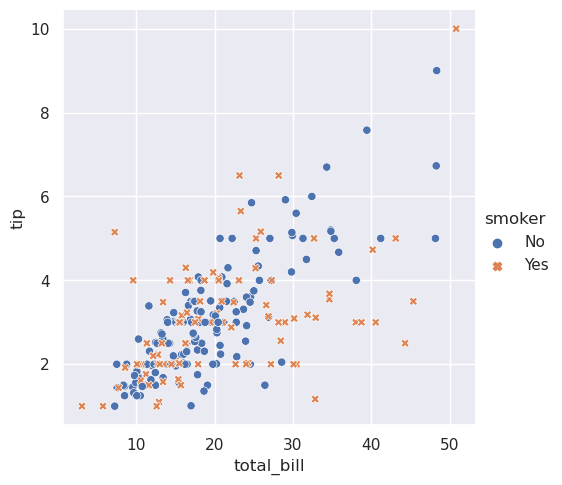

In [16]:
sns.relplot(data=tips,x="total_bill", y="tip", hue="smoker", style="smoker")

It’s also possible to represent four variables by changing the hue and style of each point independently. 

But this should be done carefully, because the eye is much less sensitive to shape than to color:

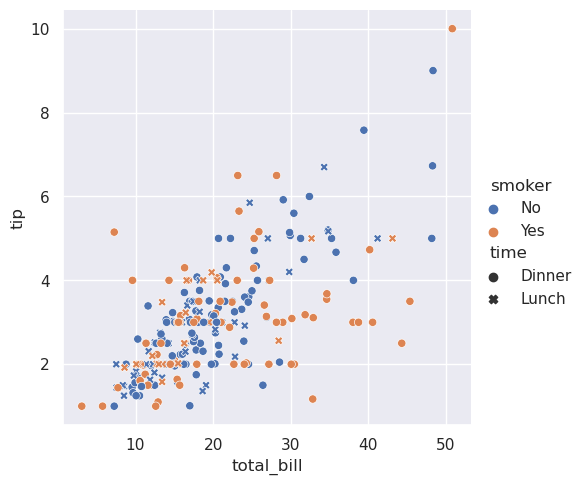

In [17]:
sns.relplot(data=tips,x="total_bill", y="tip", hue="smoker", style="time")

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. 

If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

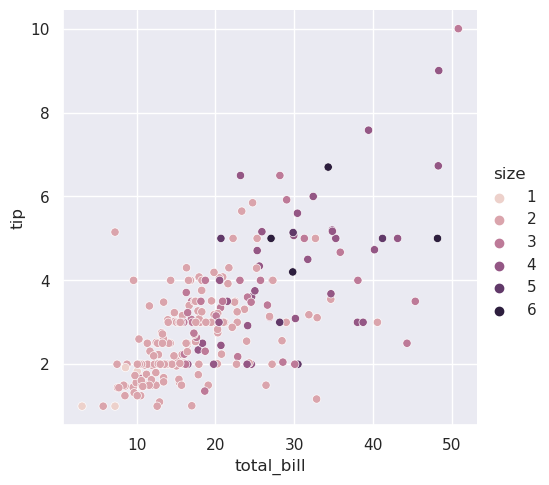

In [18]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="size")

The third kind of semantic variable changes the size of each point:

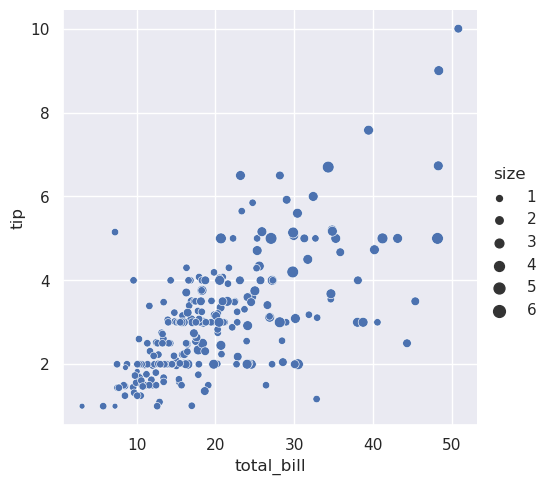

In [19]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

## Emphasizing continuity with line plots<a class="anchor" id="01c"></a>
Scatter plots are highly effective, but there is no universally optimal type of visualisation. Instead, the visual representation should be adapted for the specifics of the dataset and to the question you are trying to answer with the plot.

With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable. In this situation, a good choice is to draw a line plot. 

In [20]:
# dowjones = sns.load_dataset("dowjones")
dowjones = pd.read_csv('data/dowjones.csv')

In [21]:
dowjones.head(10)

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45
5,1915-05-01,65.95
6,1915-06-01,68.40
7,1915-07-01,71.85
8,1915-08-01,79.25
9,1915-09-01,85.50


In [22]:
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    649 non-null    object 
 1   Price   649 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.3+ KB


### Converting to datetime<a class="anchor" id="01d"></a>

In [23]:
dowjones['Date']= pd.to_datetime(dowjones['Date'])

In [24]:
dowjones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    649 non-null    datetime64[ns]
 1   Price   649 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.3 KB


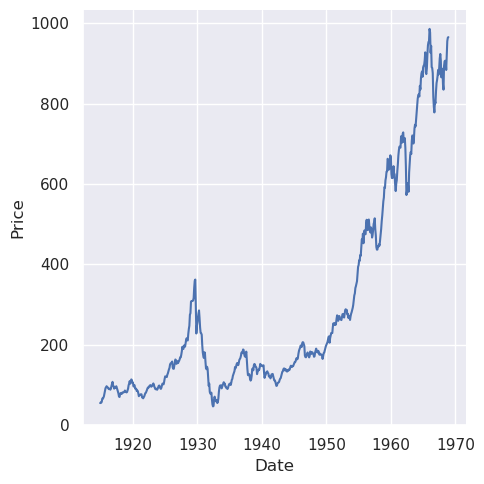

In [25]:
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

### Aggregation and representing uncertainty<a class="anchor" id="01e"></a>
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

In [26]:
fmri = sns.load_dataset("fmri")
# fmri = pd.read_csv('data/fmri.csv')

In [27]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


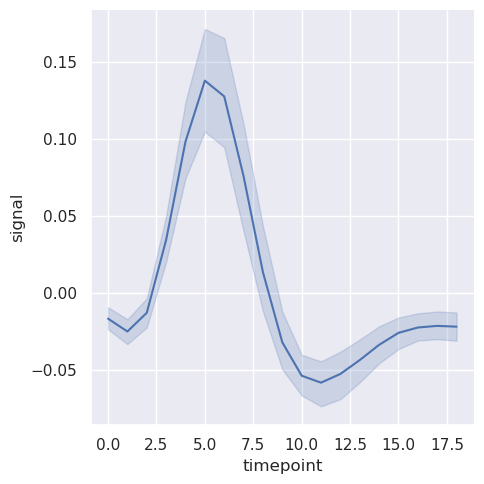

In [28]:
sns.relplot(data=fmri, x="timepoint", y="signal", kind="line")

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

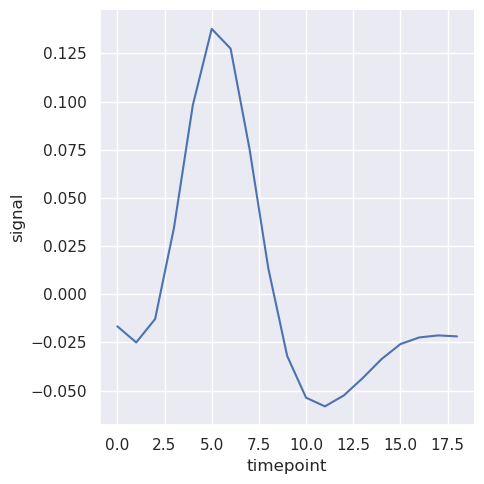

In [29]:
sns.relplot(data=fmri, kind="line",x="timepoint", y="signal", errorbar=None)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

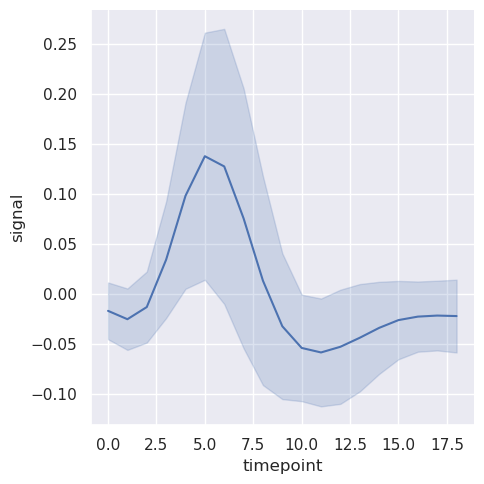

In [30]:
sns.relplot(data=fmri, kind="line",x="timepoint", y="signal", errorbar="sd")

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

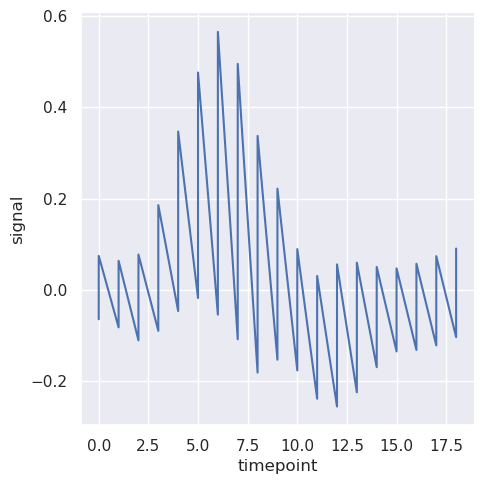

In [31]:
sns.relplot(data=fmri, kind="line",x="timepoint", y="signal",estimator=None)

### Plotting subsets of data with semantic mappings<a class="anchor" id="01f"></a>

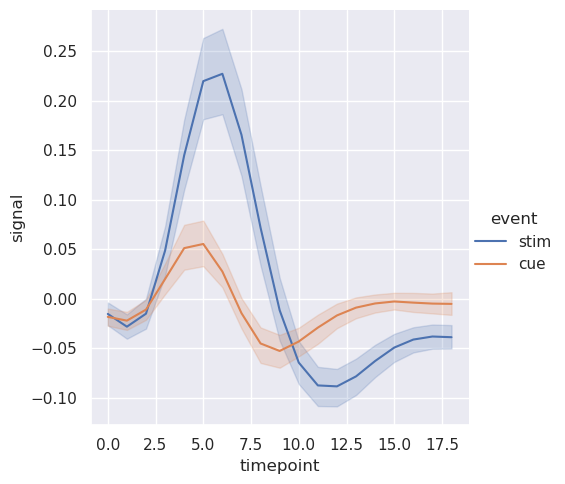

In [32]:
sns.relplot(data=fmri, kind="line",x="timepoint", y="signal", hue="event")

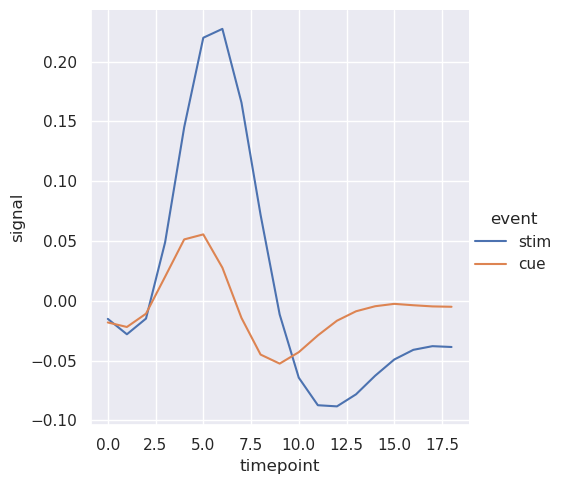

In [33]:
sns.relplot(data=fmri, kind="line",x="timepoint", y="signal", hue="event", errorbar=None)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

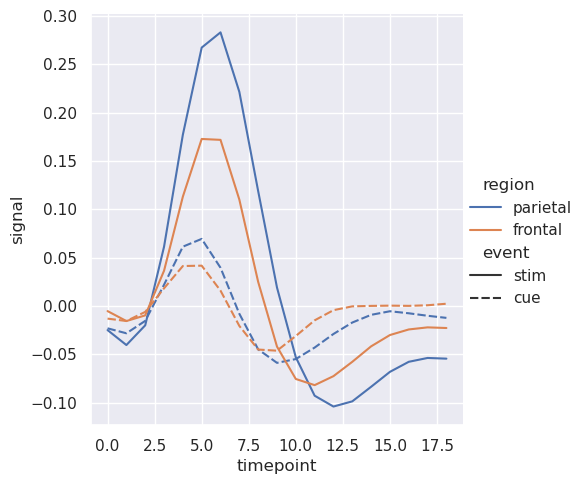

In [34]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    hue="region", style="event", errorbar=None
)

## Showing multiple relationships with facets<a class="anchor" id="01g"></a>

We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

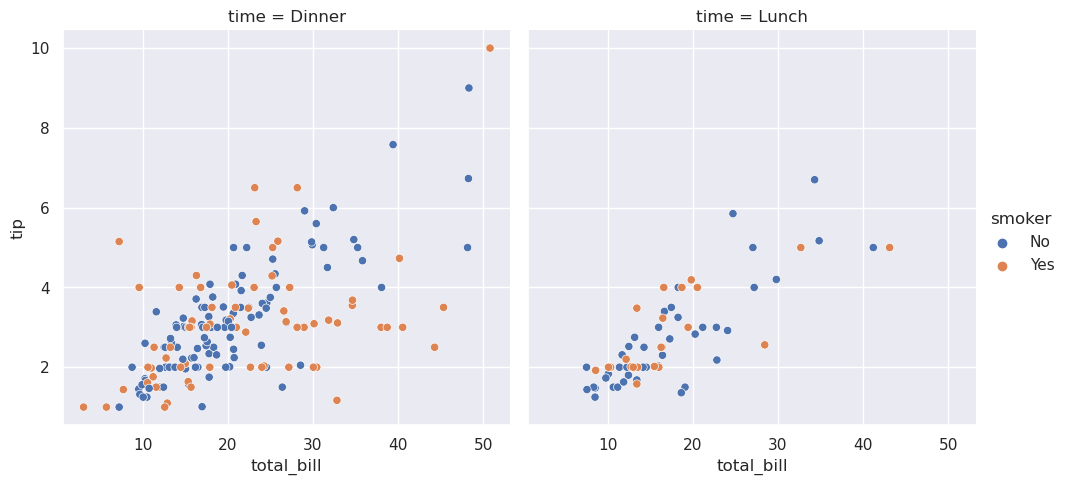

In [36]:
sns.relplot(data=tips,x="total_bill", y="tip", hue="smoker", col="time")

---

# Visualizing distributions of data<a class="anchor" id="02"></a>

An early step in any effort to analyze or model data should be to understand how the variables are distributed. 

Techniques for distribution visualization can provide quick answers to many important questions. 
- What range do the observations cover? 
- What is their central tendency? 
- Are they heavily skewed in one direction? 
- Is there evidence for bimodality? 
- Are there significant outliers? 
- Do the answers to these questions vary across subsets defined by other variables?

There are several different approaches to visualizing a distribution, and each has its relative advantages and drawbacks. It is important to understand these factors so that you can choose the best approach for your particular aim.

## Plotting univariate histograms<a class="anchor" id="02a"></a>

Perhaps the most common approach to visualizing a distribution is the histogram. This is the default approach in ```displot()```, which uses the same underlying code as ```histplot()```. 

A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

In [37]:
penguins = sns.load_dataset("penguins")
# penguins = pd.read_csv('data/penguins.csv')

In [38]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


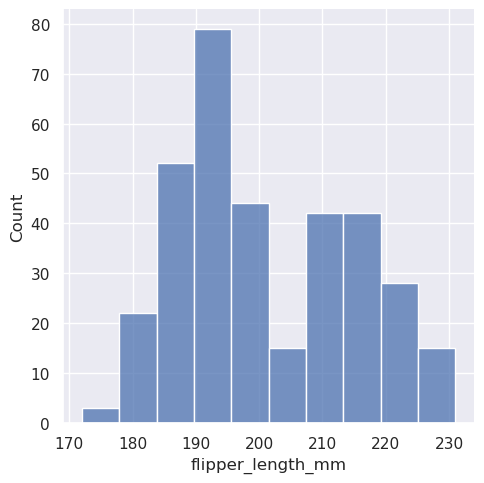

In [39]:
sns.displot(penguins, x="flipper_length_mm")

This plot immediately affords a few insights about the ```flipper_length_mm``` variable. For instance, we can see that the most common flipper length is about 195 mm, but the distribution appears bimodal, so this one number does not represent the data well.

### Choosing the bin size<a class="anchor" id="02b"></a>

The size of the ```bins``` is an important parameter, and using the wrong bin size can mislead by obscuring important features of the data or by creating apparent features out of random variability. 

By default, ```displot()```/```histplot()``` choose a default bin size based on the variance of the data and the number of observations. But you should not be over-reliant on such automatic approaches, because they depend on particular assumptions about the structure of your data. 

It is always advisable to check that your impressions of the distribution are consistent across different bin sizes. To choose the size directly, set the ```binwidth``` parameter:

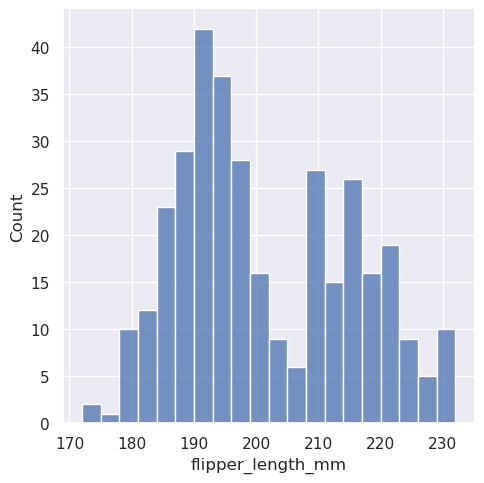

In [40]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

In other circumstances, it may make more sense to specify the number of ```bins```, rather than their size:

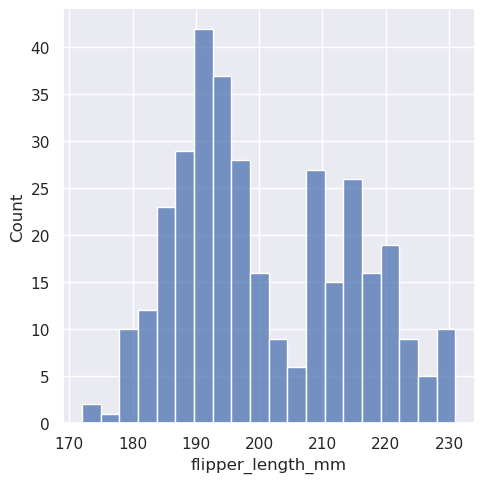

In [41]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

### Conditioning on other variables<a class="anchor" id="02c"></a>

Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset. 

For example, what accounts for the bimodal distribution of flipper lengths that we saw above? ```displot()``` and ```histplot()``` provide support for conditional subsetting via the hue semantic. 

Assigning a variable to hue will draw a separate histogram for each of its unique values and distinguish them by color:

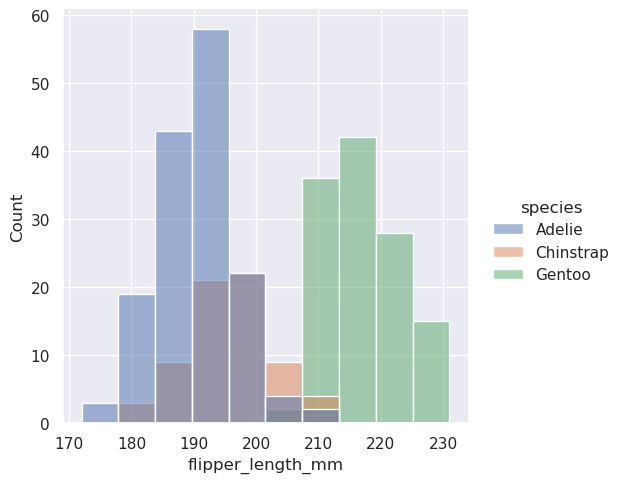

In [42]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

By default, the different histograms are “```layered```” on top of each other and, in some cases, they may be difficult to distinguish. One option is to change the visual representation of the histogram from a bar plot to a “```step```” plot:

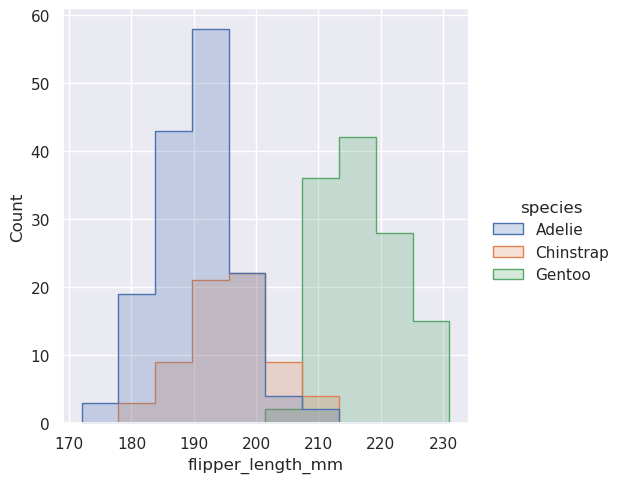

In [43]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

Alternatively, instead of layering each bar, they can be “```stacked```”, or moved vertically. In this plot, the outline of the full histogram will match the plot with only a single variable:

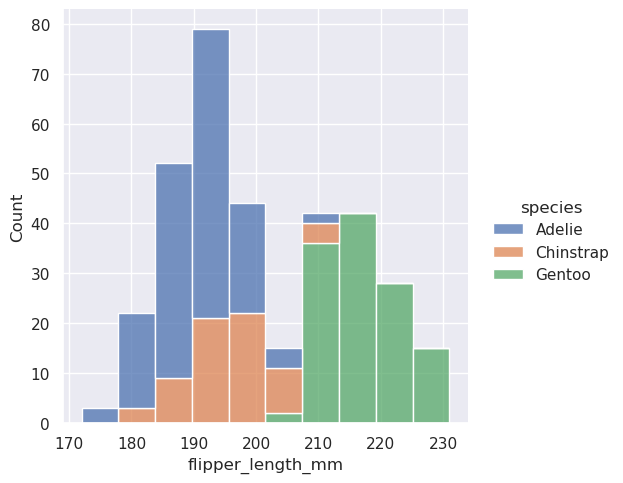

In [44]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

The stacked histogram emphasizes the part-whole relationship between the variables, but it can obscure other features (for example, it is difficult to determine the mode of the Adelie distribution. 

Another option is “```dodge```” the bars, which moves them horizontally and reduces their width. 

This ensures that there are no overlaps and that the bars remain comparable in terms of height. But it only works well when the categorical variable has a small number of levels:

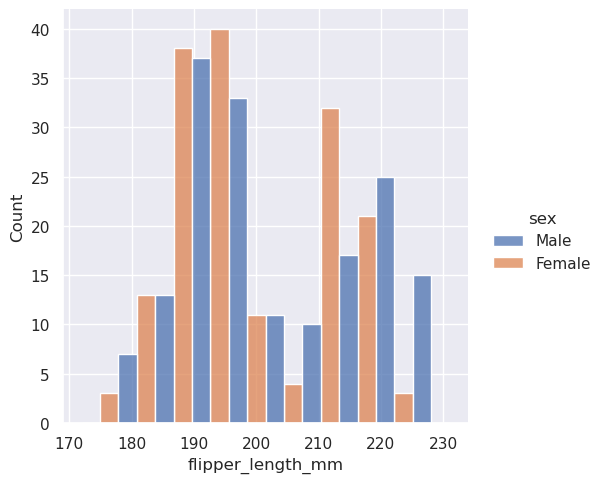

In [45]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

It is also possible to draw each individual distribution in a separate ```subplot``` by assigning the second variable to ```col``` or ```row``` rather than (or in addition to) ```hue```. This represents the distribution of each subset well, but it makes it more difficult to draw direct comparisons:

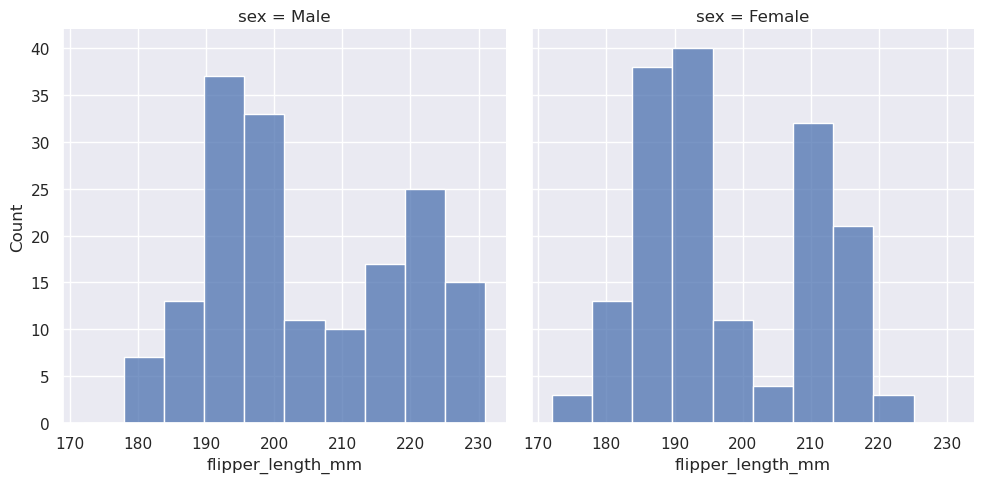

In [46]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

### Normalized histogram statistics<a class="anchor" id="02d"></a>

Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of ```counts``` may not be ideal. One solution is to ```normalize``` the ```counts``` using the ```stat``` parameter:

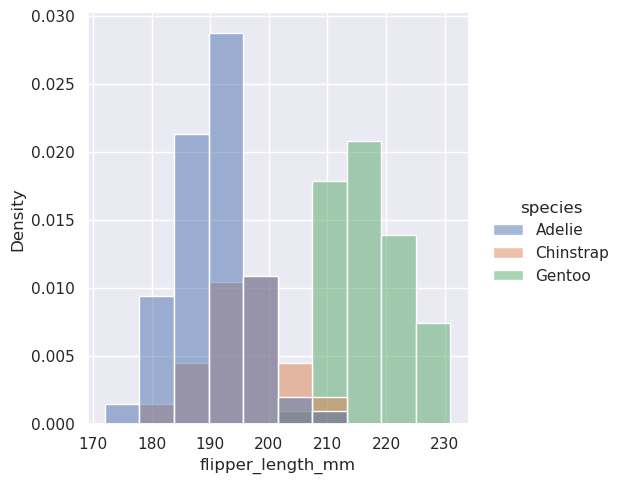

In [47]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting ```common_norm=False```, each subset will be normalized independently:

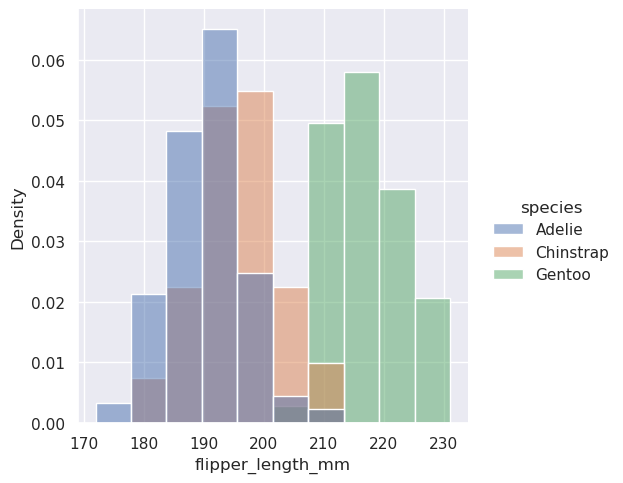

In [48]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

## Kernel density estimation<a class="anchor" id="02e"></a>

A histogram aims to approximate the underlying probability density function that generated the data by ```binning``` and counting observations. 

Kernel density estimation (```KDE```) presents a different solution to the same problem. Rather than using discrete ```bins```, a KDE plot smooths the observations with a ```Gaussian kernel```, producing a continuous density estimate:

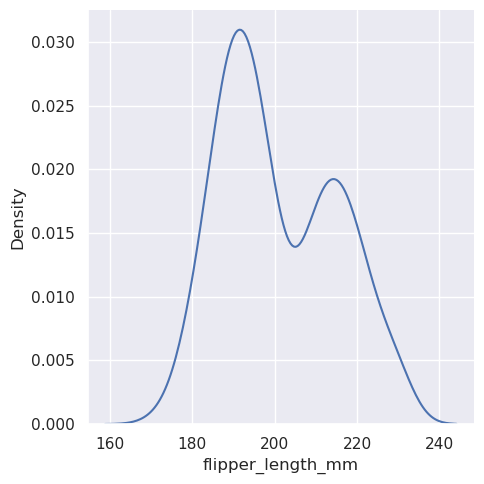

In [49]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth<a class="anchor" id="02f"></a>

Much like with the bin size in the histogram, the ability of the ```KDE``` to accurately represent the data depends on the choice of smoothing bandwidth. 

An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. 

The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

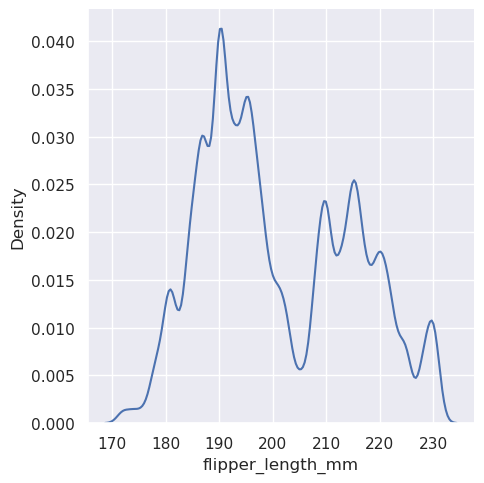

In [50]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

Note how the narrow bandwidth makes the bimodality much more apparent, but the curve is much less smooth. In contrast, a larger bandwidth obscures the bimodality almost completely:

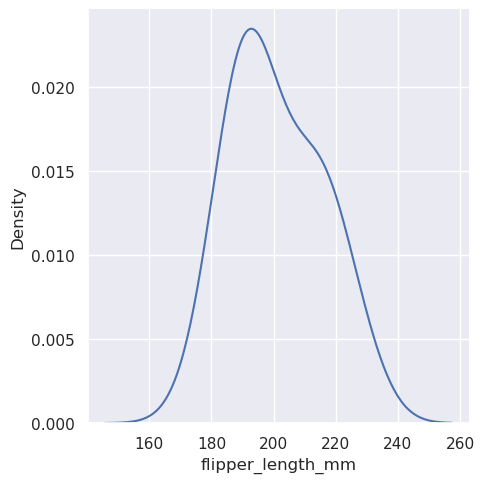

In [51]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on other variables<a class="anchor" id="02g"></a>
As with histograms, if you assign a ```hue``` variable, a separate density estimate will be computed for each level of that variable:

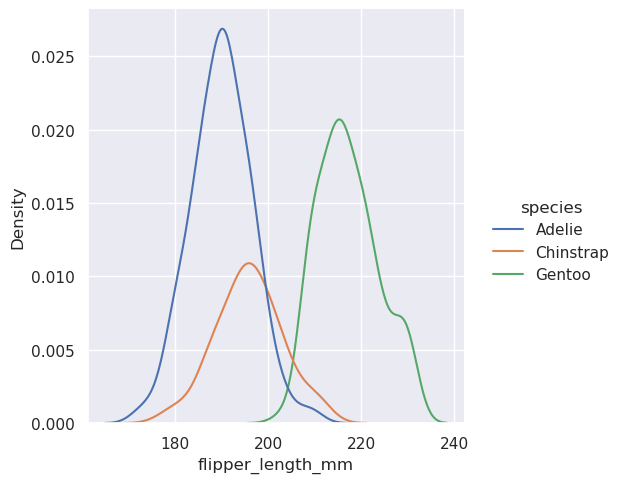

In [52]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

In many cases, the layered ```KDE``` is easier to interpret than the layered histogram, so it is often a good choice for the task of comparison. Many of the same options for resolving multiple distributions apply to the ```KDE``` as well.

It is also possible to fill in the curves for single or layered densities, although the default ```alpha``` value (opacity) will be different, so that the individual densities are easier to resolve.

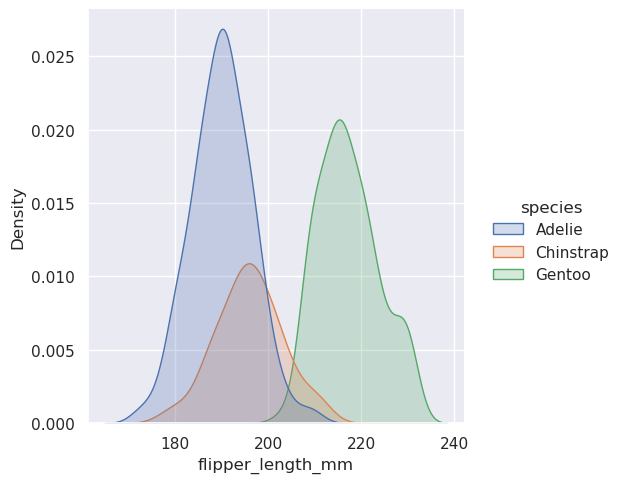

In [53]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### Kernel density estimation pitfalls<a class="anchor" id="02h"></a>
```KDE``` plots have many advantages. 

Important features of the data are easy to discern (```central tendency```, ```bimodality```, ```skew```), and they afford easy comparisons between subsets. 

But there are also situations where ```KDE``` poorly represents the underlying data. This is because the logic of KDE assumes that the underlying distribution is smooth and unbounded. 

One way this assumption can fail is when a variable reflects a quantity that is naturally bounded. If there are observations lying close to the bound (for example, small values of a variable that cannot be negative), the ```KDE``` curve may extend to unrealistic values:

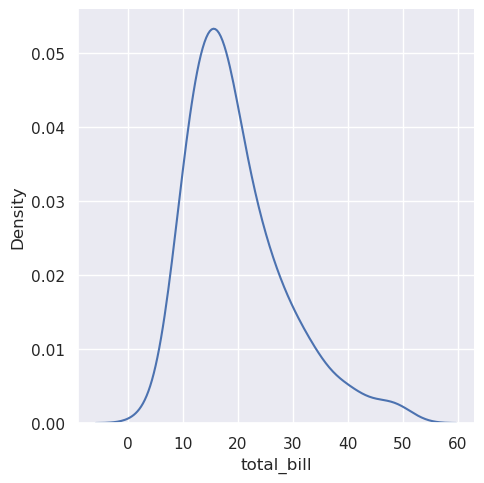

In [54]:
sns.displot(tips, x="total_bill", kind="kde")

As a compromise, it is possible to combine two approaches. While in histogram mode, ```displot()``` (as with ```histplot()```) has the option of including the smoothed ```KDE``` curve (note ```kde=True```, not ```kind="kde"```):

In [55]:
# diamonds = sns.load_dataset("diamonds")
diamonds = pd.read_csv('data/diamonds.csv')

In [56]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


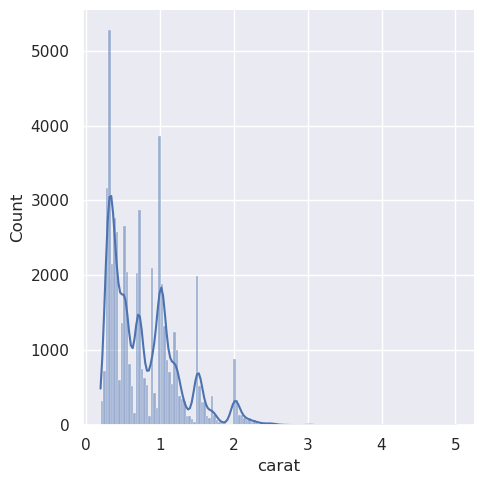

In [57]:
sns.displot(diamonds, x="carat", kde=True)

## Empirical cumulative distributions<a class="anchor" id="02i"></a>
A third option for visualizing distributions computes the “empirical cumulative distribution function” (```ECDF```). 

This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

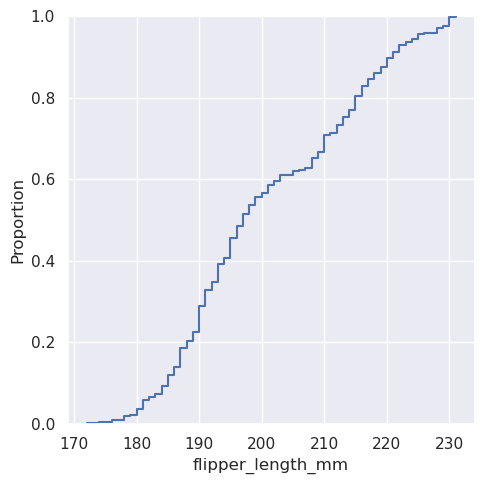

In [58]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

The ```ECDF``` plot has two key advantages. 
- Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. 
- Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

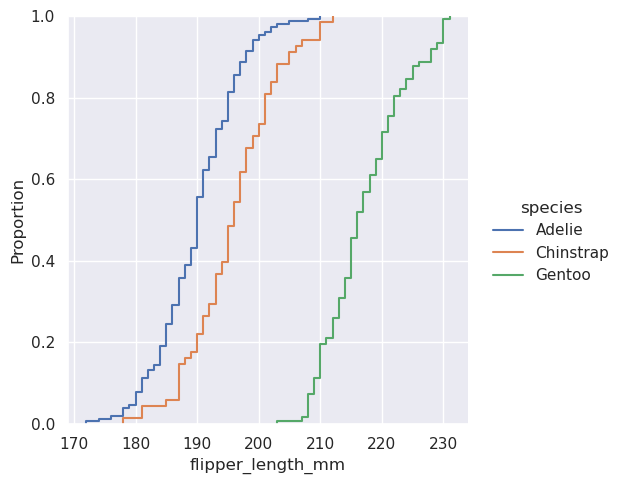

In [59]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

## Visualizing bivariate distributions<a class="anchor" id="02j"></a>
All of the examples so far have considered ```univariate distributions```: distributions of a single variable, perhaps conditional on a second variable assigned to hue. Assigning a second variable to y, however, will plot a ```bivariate distribution```:

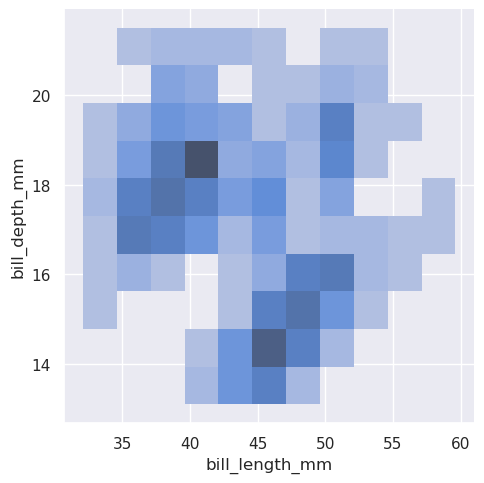

In [60]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

A bivariate histogram ```bins``` the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color (analogous to a ```heatmap()```)

Assigning a ```hue``` variable will plot multiple ```heatmaps``` or contour sets using different colors. For ```bivariate histograms```, this will only work well if there is minimal overlap between the conditional distributions:

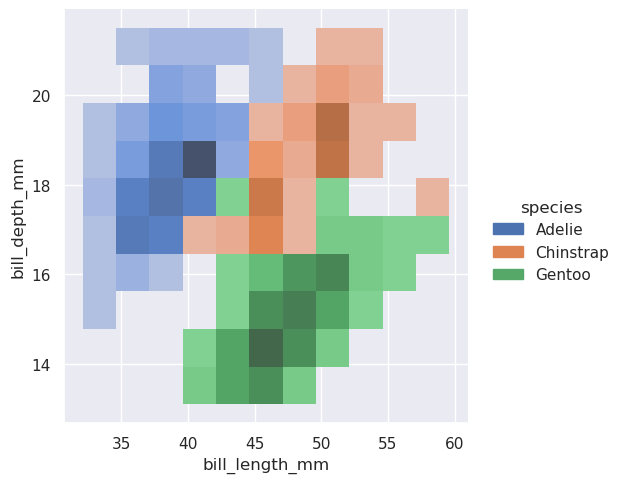

In [61]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

To aid interpretation of the ```heatmap```, add a colorbar to show the mapping between counts and color intensity:

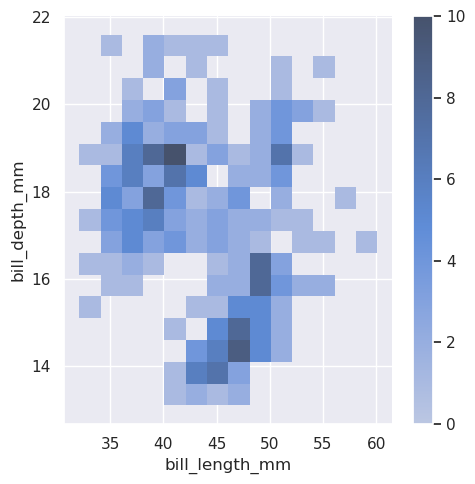

In [62]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

## Plotting joint and marginal distributions<a class="anchor" id="02k"></a>
The first is ```jointplot()```, which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. 

By default, ```jointplot()``` represents the bivariate distribution using ```scatterplot()``` and the marginal distributions using ```histplot()```:

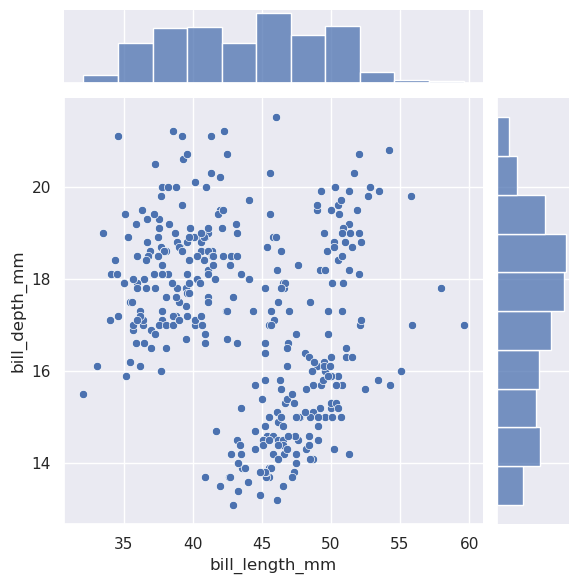

In [63]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

## Plotting many distributions<a class="anchor" id="02l"></a>

The ```pairplot()``` function offers a similar blend of joint and marginal distributions. 

Rather than focusing on a single relationship, however, ```pairplot()``` uses a “small-multiple” approach to visualize the ```univariate distribution``` of all variables in a dataset along with all of their pairwise relationships:

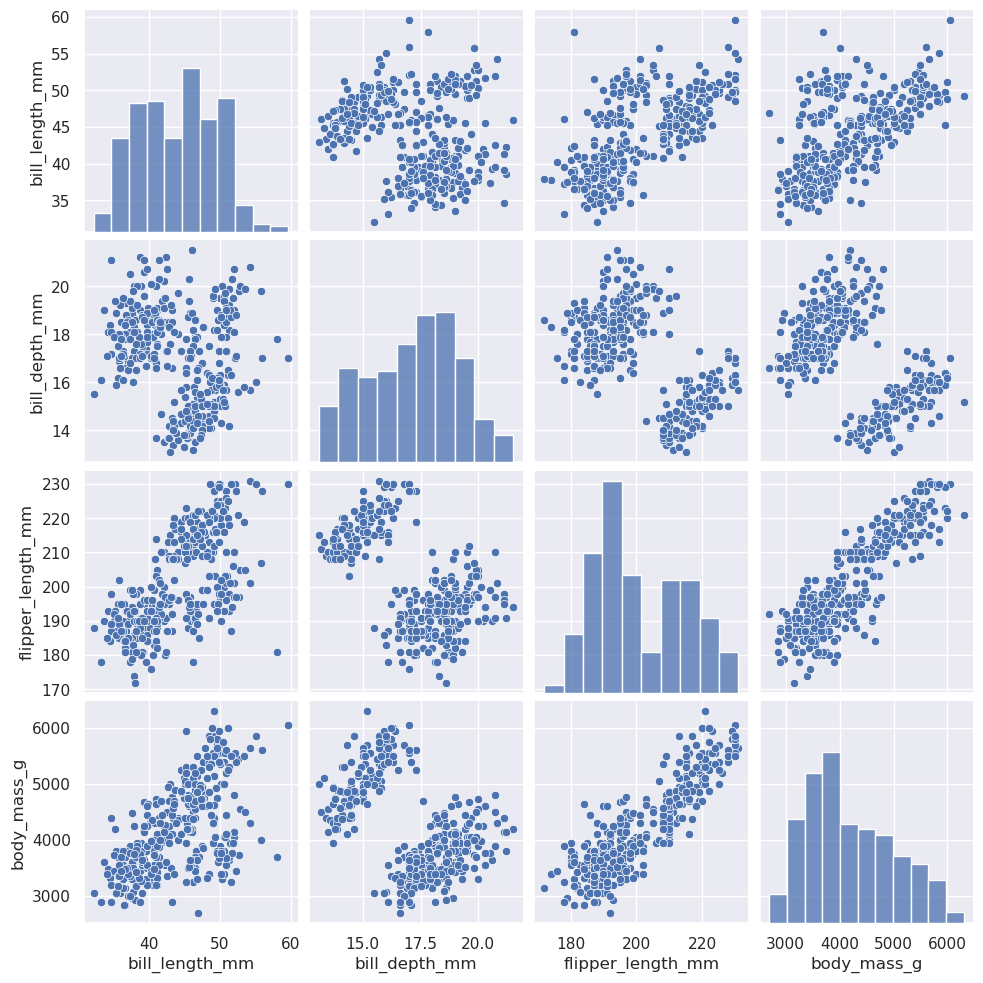

In [64]:
sns.pairplot(penguins)

# Visualizing categorical data<a class="anchor" id="03"></a>

In seaborn, there are several different ways to visualize a relationship involving categorical data. 

Similar to the relationship between ```relplot()``` and either ```scatterplot()``` or ```lineplot()```, there are two ways to make these plots. 

There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

#### Categorical scatterplots:
- ```stripplot()``` (with ```kind="strip"```; the default)
- ```swarmplot()``` (with ```kind="swarm"```)

#### Categorical distribution plots:
- ```boxplot()``` (with ```kind="box"```)
- ```violinplot()``` (with ```kind="violin"```)
- ```boxenplot()``` (with ```kind="boxen"```)

#### Categorical estimate plots:
- ```pointplot()``` (with ```kind="point"```)
- ```barplot()``` (with ```kind="bar"```)
- ```countplot()``` (with ```kind="count"```)

These families represent the data using different levels of granularity. When deciding which to use, you’ll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

## Categorical scatterplots<a class="anchor" id="03a"></a>

The default representation of the data in ```catplot()``` uses a ```scatterplot```. 

There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. 

The approach used by ```stripplot()```, which is the default “```kind```” in ```catplot()``` is to adjust the positions of points on the categorical axis with a small amount of random “```jitter```”:

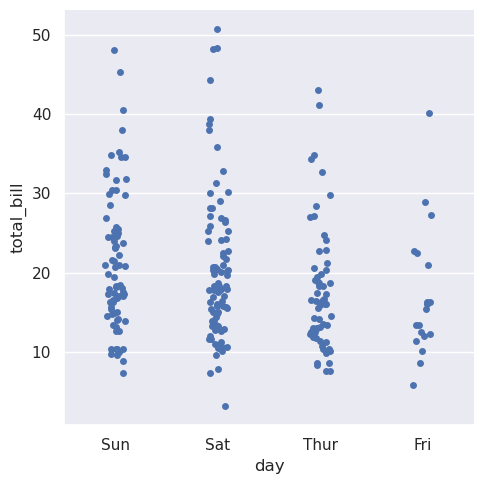

In [65]:
sns.catplot(data=tips, x="day", y="total_bill")

The ```jitter``` parameter controls the magnitude of jitter or disables it altogether:

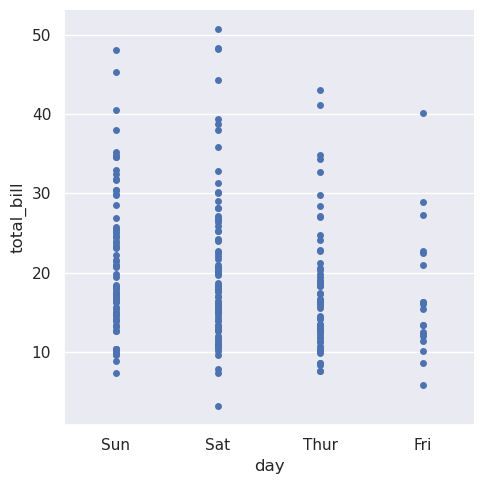

In [66]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. 

It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. 

This kind of plot is sometimes called a “```beeswarm```” and is drawn in seaborn by ```swarmplot()```, which is activated by setting ```kind="swarm"``` in ```catplot()```:

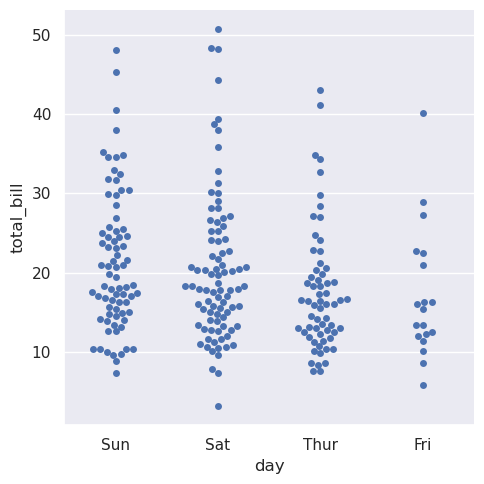

In [67]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a ```hue``` semantic.

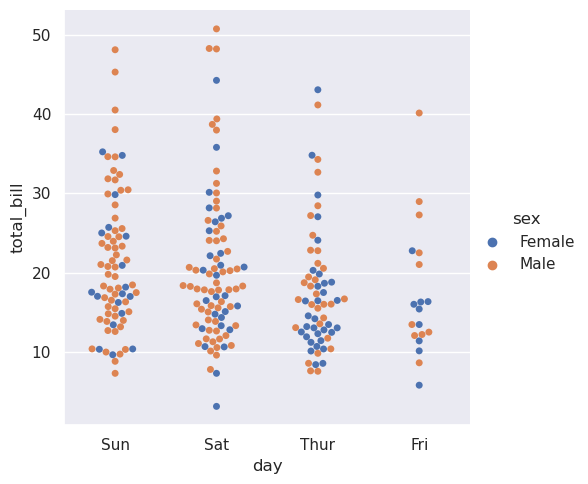

In [68]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

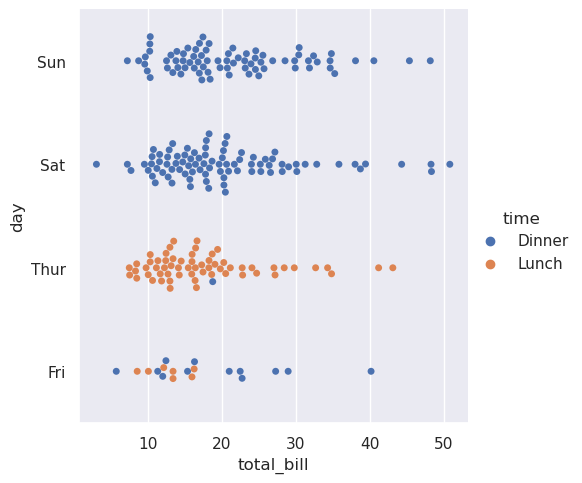

In [69]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

## Comparing distributions<a class="anchor" id="03b"></a>

As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. 

When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

### Boxplots<a class="anchor" id="03c"></a>
The first is the familiar ```boxplot()```. This kind of plot shows the three quartile values of the distribution along with extreme values. 

The “```whiskers```” extend to points that lie within ```1.5 IQRs``` of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 

This means that each value in the boxplot corresponds to an actual observation in the data.

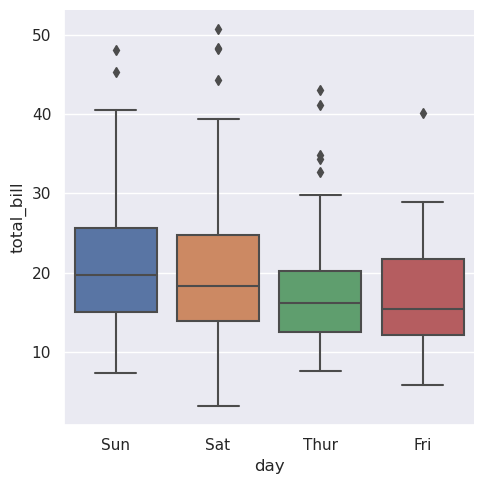

In [70]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

When adding a hue semantic, the box for each level of the semantic variable is moved along the categorical axis so they don’t overlap:

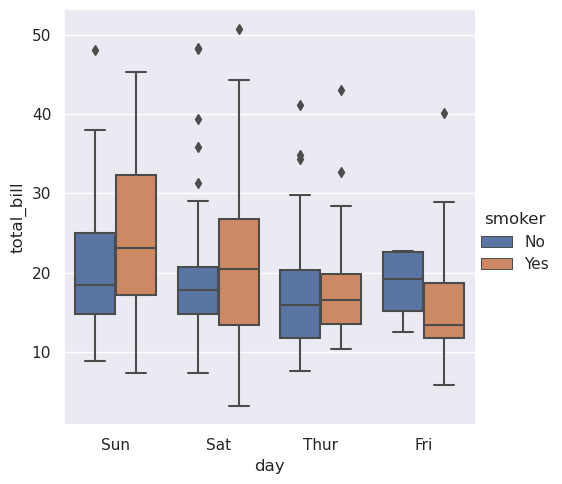

In [71]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

This behavior is called “```dodging```” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable.

A related function, ```boxenplot()```, draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

### Boxenplot<a class="anchor" id="03d"></a>

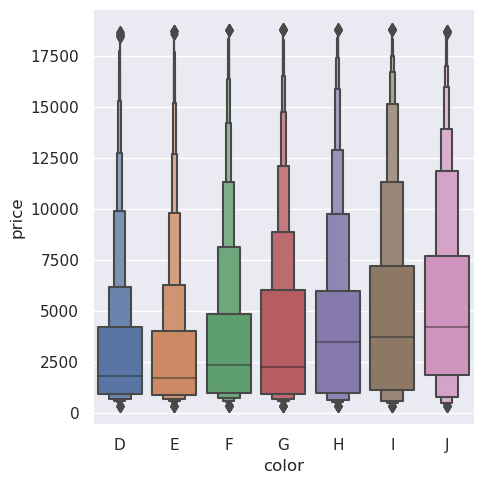

In [72]:
sns.catplot(data=diamonds.sort_values("color"),x="color", y="price", kind="boxen")

### Violinplots<a class="anchor" id="03e"></a>

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial:

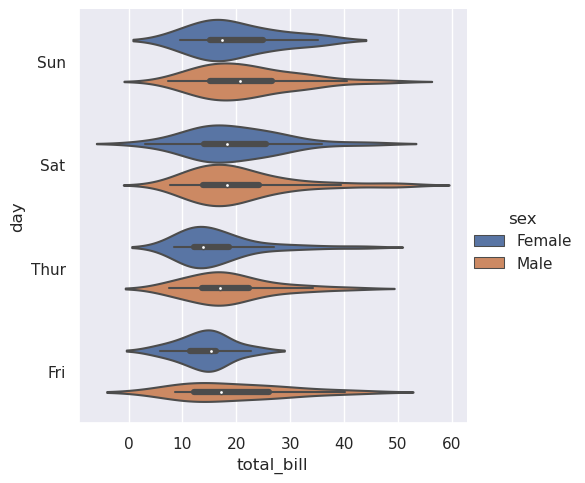

In [73]:
sns.catplot(data=tips, x="total_bill", y="day", hue="sex", kind="violin")

## Estimating central tendency<a class="anchor" id="03f"></a>

For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. 

### Bar plots<a class="anchor" id="03g"></a>

A familiar style of plot that accomplishes this goal is a bar plot. 

In seaborn, the ```barplot()``` function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). 

In [74]:
titanic = sns.load_dataset("titanic")
# titanic = pd.read_csv('data/titanic.csv')

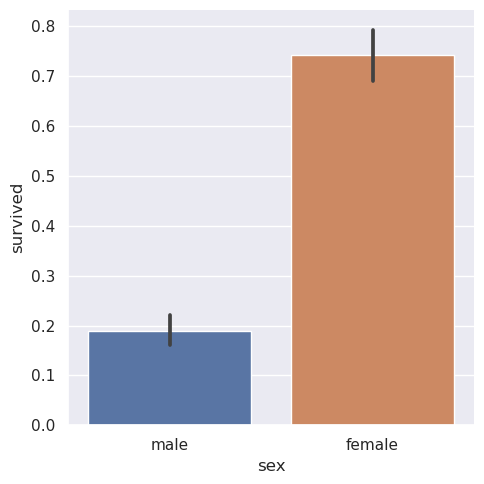

In [75]:
sns.catplot(data=titanic, x="sex", y="survived", kind="bar")

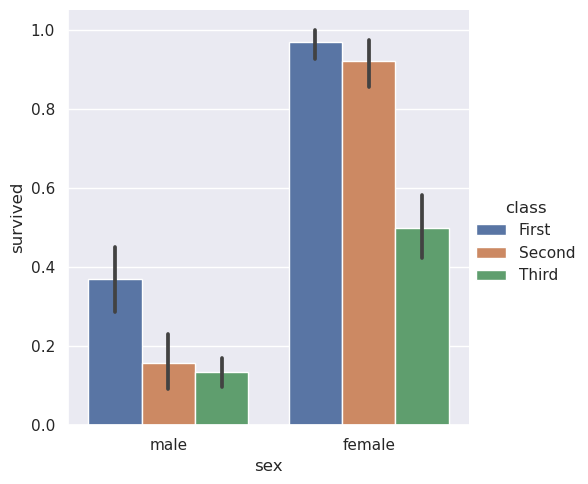

In [76]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

### Count Plots<a class="anchor" id="03h"></a>

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. 

This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the ```countplot()``` function:

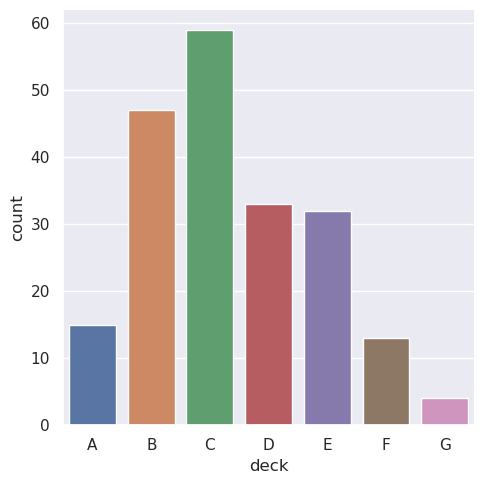

In [77]:
sns.catplot(data=titanic, x="deck", kind="count")